# <br style="text-align: center;">MIS382: Advanced Predictive Modeling Final Project</br>
## <br style="text-align: center;">Team Member: Jinming Li, Yile Zhou, Vir Mehta, Rulan Pan, Tianxin Huang</br>

#### **Abstract:**

We are Graduate Students at the University of Texas at Austin studying Business Analytics, and we were able to use Deep Learning and advanced modeling techniques we have learned in the classroom to address an interesting and relevant problem that we believe is going to become a point of emphasis for companies in the very near future. This interesting business problem is being able to accurately detect an individual’s emotion based on their facial expression. We used a two-step approach to try and tackle this emotion detection problem, and we are excited to walk you through exactly how we were able to do this.

#### **Introduction & Background:**

Throughout human history, people have had to be able to quickly identify other people's facial expressions and then change their behavior based on how that individual is conveying their expression. If you are engaging in conversation with an individual and they are showing you that they are either annoyed, frustrated, or uninterested, then you are very likely going to have to adjust your behavior and be aware of their emotion. If you are in sales, then being able to detect how responsive your customer is to your sales pitch can drastically impact sales and profits for your firm. Being able to accurately detect an individual’s emotion based on their facial expression is an extremely beneficial tool that has the potential to impact people both personally and professionally, and we are excited to share how we were able to build a model that can achieve this goal. 

Given the importance and business relevance of the emotion detection concept, there has actually been quite extensive work done in the field by many leading technology firms- most notably Microsoft Azure. We suspect that this area of interest is likely to continue to grow, especially as identifying a customer’s emotions becomes more and more relevant in all aspects of a successful business.

Since we obviously do not have the resources of a leading technology firm, we were faced with the challenge of deriving a unique approach that could be implemented in an efficient and timely manner. Through various techniques based on modeling and  Deep Learning, our team was able to continuously improve our emotion detection model and think of innovative ways to address data science problems such as overfitting.

One unique aspect of our project is that we were actually faced with having to build two models to successfully tackle this problem. The first model would require us to detect the individual’s face in the first place.

The next phase would be to create a model that can recognize the emotion being expressed by the facial image. The output of our emotion detection model once the image of face has been run through the model.

Having this two-step approach to solving this interesting and relevant problem was an exciting project to undertake, and we will now go in to more detail about what we were able to accomplish.

## PART 1: Facial Key Point Detection

### Step 1: Data Preprocessing & Visualization

In [11]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
from math import sqrt
%matplotlib inline

data_train = pd.read_csv('key_point_training.csv')
data_test = pd.read_csv('key_point_test.csv')
data_non_face = pd.read_csv('scene.csv')loc[:, 'Image']
data_non_face['Face'] = 0
data = pd.concat([data_train, data_test], axis = 0, sort= False)
data['Face'] = 1
data_vc = data['Image'].value_counts()
duplicate = data_vc[data_vc > 1]
dup_index = duplicate.index.values
def only(x):
    if x not in dup_index:
        return True
    else:
        return False
data['Only'] = data['Image'].map(only)
data_non_face['Only'] = data_non_face['Image'].map(only)
data = pd.concat([data[data['Only'] == True].drop(columns = ['ImageId', 'Only']).loc[:, ['Face', 'Image']], 
                  data_non_face[data_non_face['Only'] == True].drop(columns = ['ImageId', 'Only']).loc[:, ['Face', 'Image']]]
data.head(2)

Face                                              Image
0     1  238 236 237 238 240 240 239 241 241 243 240 23...
1     1  219 215 204 196 204 211 212 200 180 168 178 19...

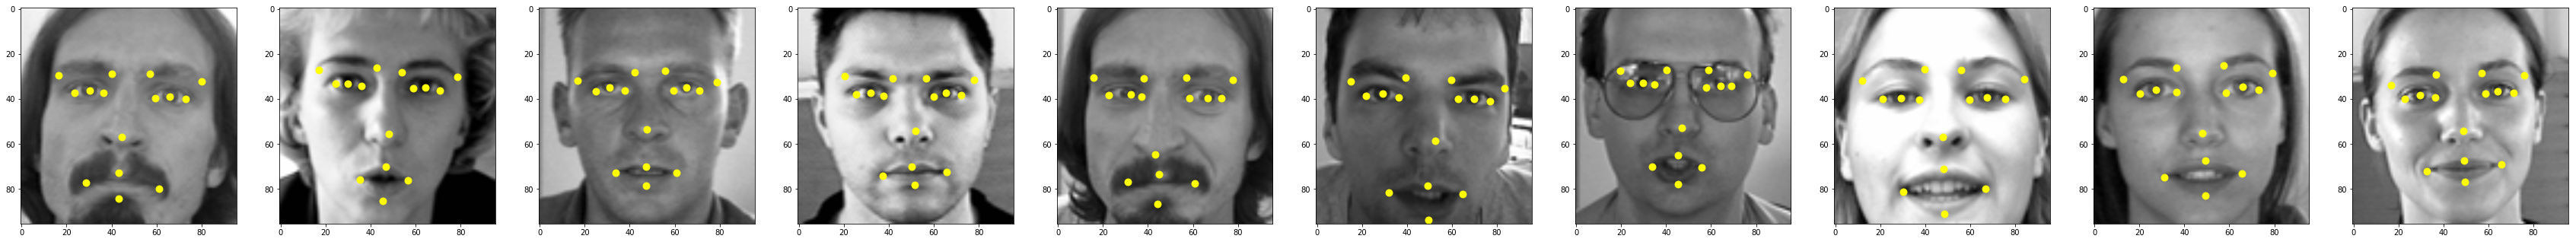

In [3]:
data_new = data.head(10)
fig, axes = plt.subplots(1, 10, figsize = (60, 6))

for i in range(len(data_new)):
    a = data_new['Image'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')
    key_point_xy = data_new.iloc[i, :-1].values
    key_point_x_list = []
    key_point_y_list = []
    for j in range(0, len(key_point_xy), 2):
        key_point_x_list.append(key_point_xy[j])
        key_point_y_list.append(key_point_xy[j + 1])
    axes[i].scatter(key_point_x_list, key_point_y_list, s = 80, color = 'yellow')

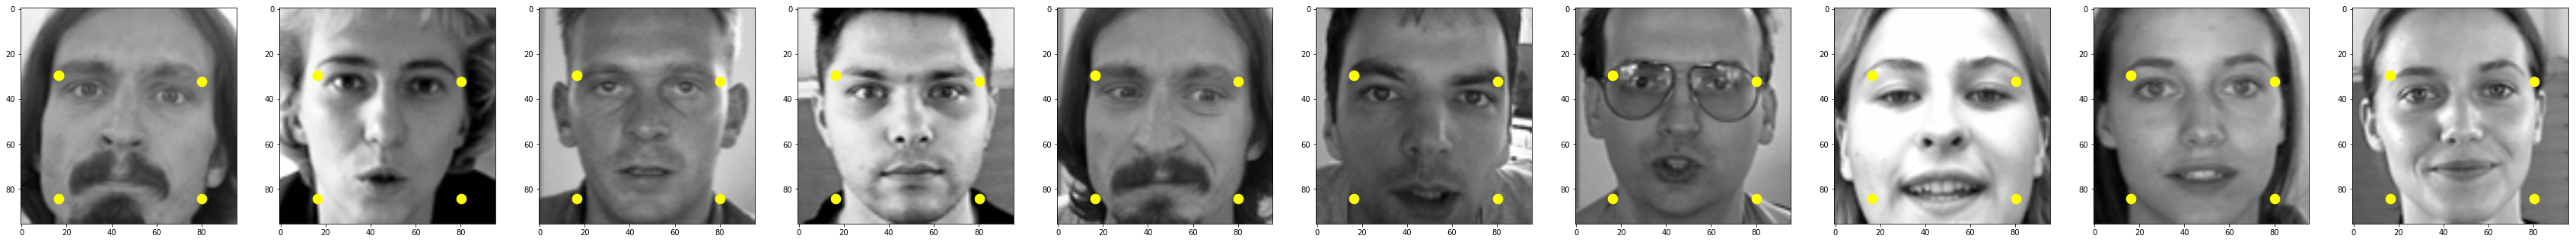

In [4]:
data_new = data.head(10)
fig, axes = plt.subplots(1, 10, figsize = (60, 6))

for i in range(len(data_new)):
    a = data_new['Image'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')
    key_point = data_new.iloc[0, :-1]
    axes[i].scatter(key_point.loc[['right_eyebrow_outer_end_x', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_x', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_x']], 
         key_point.loc[['right_eyebrow_outer_end_y', 'left_eyebrow_outer_end_y', 'mouth_center_bottom_lip_y', 'mouth_center_bottom_lip_y', 'right_eyebrow_outer_end_y']],
        color = 'yellow', s = 160)

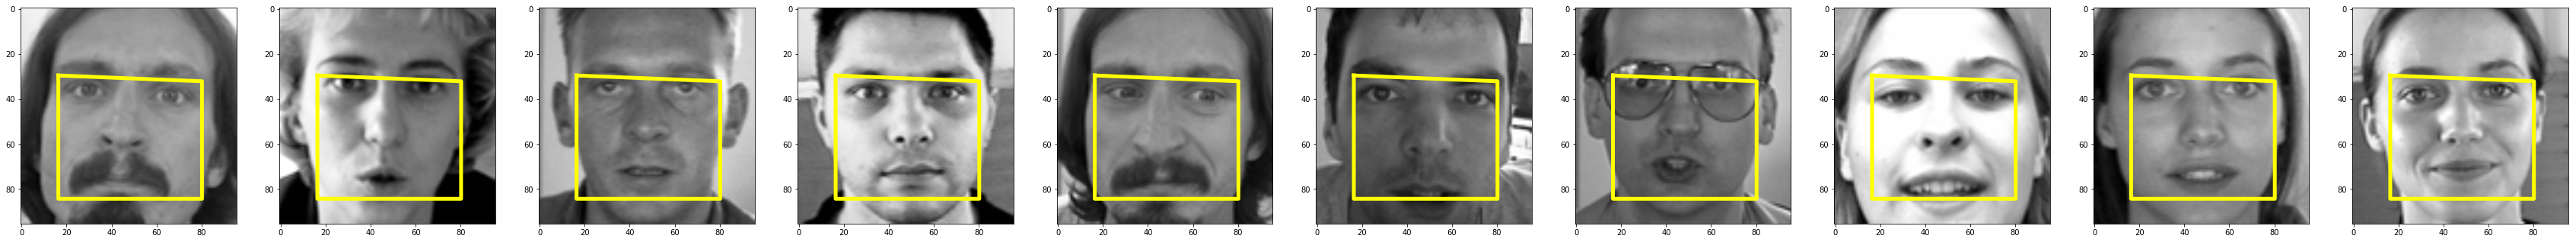

In [5]:
data_new = data.head(10)
fig, axes = plt.subplots(1, 10, figsize = (60, 6))

for i in range(len(data_new)):
    a = data_new['Image'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')
    key_point = data_new.iloc[0, :-1]
    axes[i].plot(key_point.loc[['right_eyebrow_outer_end_x', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_x', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_x']], 
         key_point.loc[['right_eyebrow_outer_end_y', 'left_eyebrow_outer_end_y', 'mouth_center_bottom_lip_y', 'mouth_center_bottom_lip_y', 'right_eyebrow_outer_end_y']],
        color = 'yellow', linewidth = 5)

### 2) Data Preprocessing:

    1.Combined face images and non-faces images together;
    
    2.Dummy coding face and non-face images;
    
    3.Rescale pixel values in range [0, 1] through each pixel divided by 255;
    
    3.Split data 80% to be training set & 20% to be test set

In [ ]:
from sklearn.model_selection import train_test_split
import skimage

pixel_df = data['Image'].str.split(' ', expand = True)
pixel_df.columns = ['Image_' + str(i + 1) for i in range(2304)]
train_X, train_Y, test_X, test_Y = train_test_split(pixel_df, data['Face'], test_size = 0.2)
train_X = (np.array(train_X, dtype = 'float64') / 255).reshape(-1, 48, 48, 1)
train_Y = np.array(train)
test_X = (np.array(test_X, dtype = 'float64') / 255).reshape(-1, 48, 48, 1)
test_Y = np.array(test_Y)

print('Training Set X Shape:', train_X.shape)
print('Training Set Y Shape:', train_Y.shape)
print('Testing Set X Shape:', test_X.shape)
print('Testing Set Y Shape:', test_Y.shape)

### Step 2: Convolutional Neural Network on face/non-face classification

In [ ]:
cnn_model_dropout = Sequential()
# Convolutional Layer 1:
cnn_model_dropout.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (48, 48, 1), padding = 'same'))
cnn_model_dropout.add(BatchNormalization())
cnn_model_dropout.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 1:
cnn_model_dropout.add(MaxPooling2D((2, 2), strides = (2, 2), padding = 'same'))
# Convolutional Layer 2:
cnn_model_dropout.add(Conv2D(64, kernel_size = (3, 3), activation = 'linear', padding = 'same'))
cnn_model_dropout.add(BatchNormalization())
cnn_model_dropout.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 2:
cnn_model_dropout.add(MaxPooling2D((2, 2), strides = (2, 2), padding = 'same'))
# Convolutional Layer 3:
cnn_model_dropout.add(Conv2D(128, kernel_size = (3, 3), activation = 'linear', padding = 'same'))
cnn_model_dropout.add(BatchNormalization())
cnn_model_dropout.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 3:
cnn_model_dropout.add(MaxPooling2D((2, 2), strides = (2, 2), padding = 'same'))
# Flatten Preprocessing:
cnn_model_dropout.add(Flatten())
# Fully Connected Layer (Dense Layer):
cnn_model_dropout.add(Dense(128, activation = 'linear'))
cnn_model_dropout.add(BatchNormalization())
cnn_model_dropout.add(LeakyReLU(alpha = 0.1))
# Dropout Layer 4:
cnn_model_dropout.add(Dropout(0.3))
# Output Layer (Dense Layer):
cnn_model_dropout.add(Dense(5, activation = 'softmax'))

# Compile CNN model
sgd = keras.optimizers.SGD(lr = 0.005, decay = 1e-6, momentum = 0.8, nesterov = True)
cnn_model_dropout.compile(loss = keras.losses.categorical_crossentropy, optimizer = sgd, metrics = ['accuracy'])
cnn_model_dropout.summary()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    horizontal_flip = True)
datagen.fit(train_X)

# Fits the model on batches with real-time data augmentation:
cnn_model_process = cnn_model_dropout.fit_generator(datagen.flow(train_X, train_Y, batch_size = 32),
                                                            steps_per_epoch = len(train_X) / 32, 
                                                            epochs = 20, verbose = 1, validation_data = (test_X, test_Y))
# cnn_model_process = cnn_model.fit(train_X, train_Y, batch_size = 32, epochs = 20, verbose = 1, validation_data = (test_X, test_Y))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(cnn_model_dropout_process.history['acc']) + 1), cnn_model_dropout_process.history['acc'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(cnn_model_dropout_process.history['val_acc']) + 1), cnn_model_dropout_process.history['val_acc'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('CNN Dropout Accuracy Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(cnn_model_dropout_process.history['loss']) + 1), cnn_model_dropout_process.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(cnn_model_dropout_process.history['val_loss']) + 1), cnn_model_dropout_process.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Dropout Loss Trainig VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

## PART 2: Facial Expression Detection

### Step 1: Data Preprocessing & Visualization

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
from math import sqrt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

data = pd.read_csv('/floyd/input/emotion_detection_dataset/raw_data.csv')
data.columns = ['Emotion', 'Pixels', 'Usage']
data_vc = data['Pixels'].value_counts()
duplicate = data_vc[data_vc > 1]
dup_index = duplicate.index.values
def only(x):
    if x not in dup_index:
        return True
    else:
        return False
data['Only'] = data['Pixels'].map(only)
data = data[data['Only'] == True]
data = data.drop(columns = ['Only', 'Usage'])
data.head()

Emotion                                             Pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...

In [2]:
data['Emotion'].value_counts()

3    8614
6    5916
4    5786
0    4583
2    4556
5    2669
1     394
Name: Emotion, dtype: int64

### 1) Identify Emotions: 
    0: Angry
    1: Frustrated
    2: Angry
    3: Happy
    4: Frustrated
    5: Surprised
    6: Unemotional

#### 0: Angry

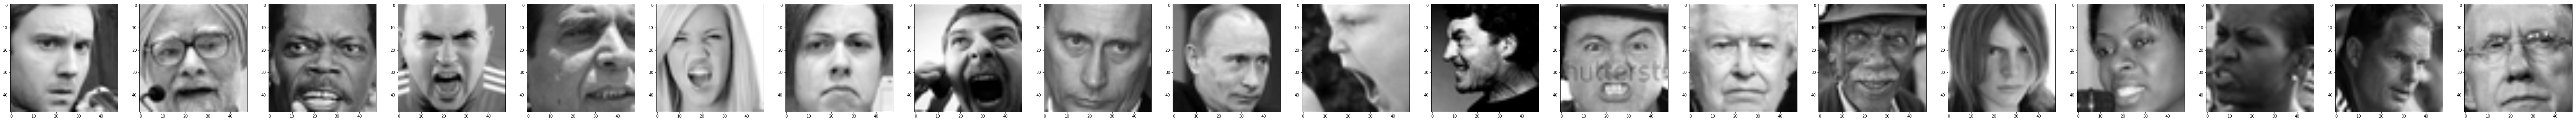

In [3]:
data_new = data[data['Emotion'] == 0].head(20)
fig, axes = plt.subplots(1, 20, figsize = (120, 6))

for i in range(len(data_new)):
    a = data_new['Pixels'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')

#### 1: Frustrated

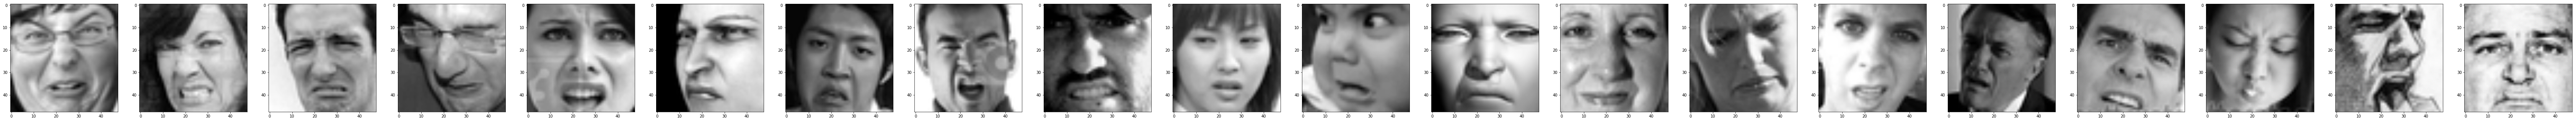

In [4]:
data_new = data[data['Emotion'] == 1].head(20)
fig, axes = plt.subplots(1, 20, figsize = (120, 6))

for i in range(len(data_new)):
    a = data_new['Pixels'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')

#### 2: Angry

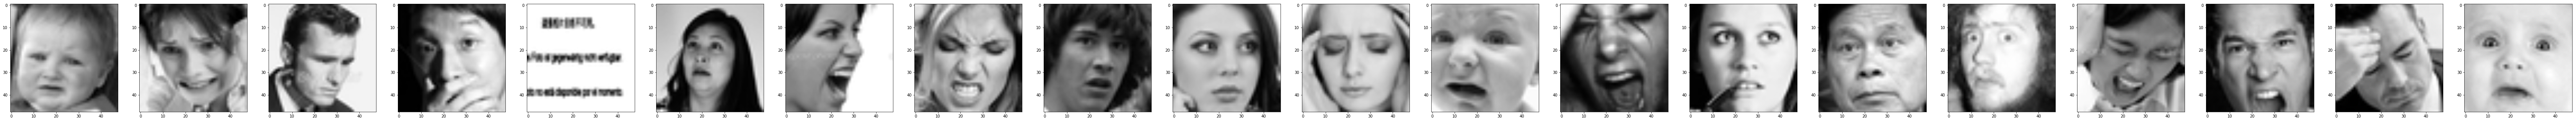

In [5]:
data_new = data[data['Emotion'] == 2].tail(20)
fig, axes = plt.subplots(1, 20, figsize = (120, 6))

for i in range(len(data_new)):
    a = data_new['Pixels'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')

#### 3: Happy

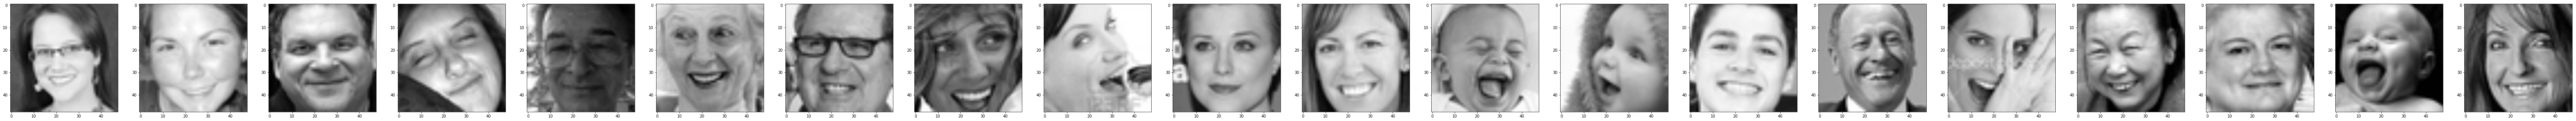

In [6]:
data_new = data[data['Emotion'] == 3].head(20)
fig, axes = plt.subplots(1, 20, figsize = (120, 6))

for i in range(len(data_new)):
    a = data_new['Pixels'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')

#### 4: Frustrated

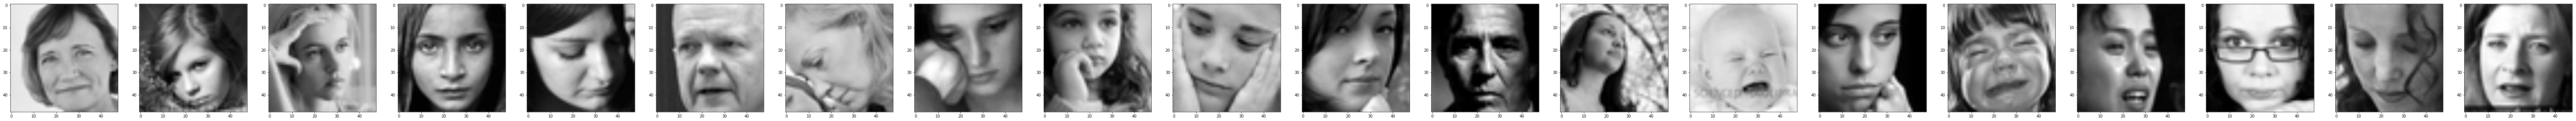

In [7]:
data_new = data[data['Emotion'] == 4].tail(20)
fig, axes = plt.subplots(1, 20, figsize = (120, 6))

for i in range(len(data_new)):
    a = data_new['Pixels'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')

#### 5: Surprised

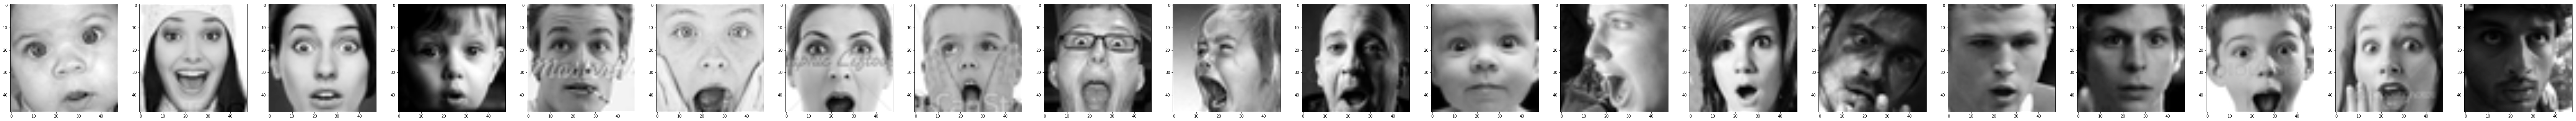

In [8]:
data_new = data[data['Emotion'] == 5].tail(20)
fig, axes = plt.subplots(1, 20, figsize = (120, 6))

for i in range(len(data_new)):
    a = data_new['Pixels'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')

#### 6: Unemotional

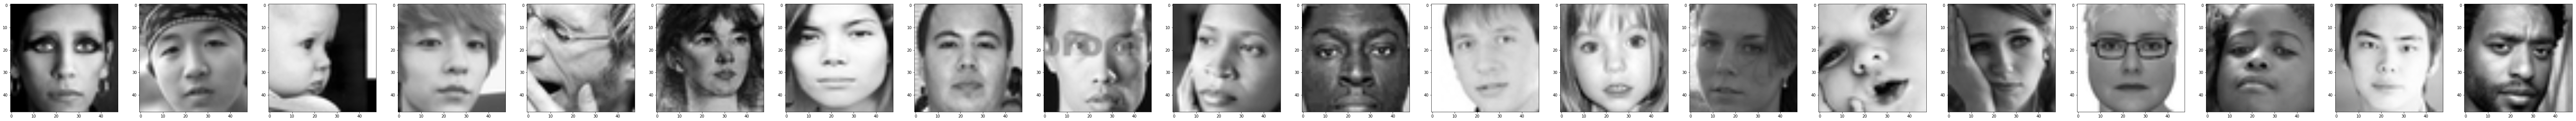

In [9]:
data_new = data[data['Emotion'] == 6].head(20)
fig, axes = plt.subplots(1, 20, figsize = (120, 6))

for i in range(len(data_new)):
    a = data_new['Pixels'].iloc[i].split(' ')
    pic = np.array(a, dtype = float).reshape(48, 48)
    axes[i].imshow(pic, interpolation = 'bilinear', cmap = 'gray')

### 2) Data Preprocessing:

    1.Combined 0&2-Angry, 1&4-Frustrated, 3-Happy, 5-Surprised, 6-Unemotional to be 5 categories;
    
    2.Dummy coding 5 emotions;
    
    3.Rescale pixel values in range [0, 1] through each pixel divided by 255;
    
    3.Split data 80% to be training set & 20% to be test set

In [2]:
pixel_df = data['Pixels'].str.split(' ', expand = True)
pixel_df.columns = ['Pixel_' + str(i + 1) for i in range(2304)]
data = pd.concat([data.drop(columns = ['Pixels']), pixel_df, data.drop(columns = ['Emotion', 'Pixels'])], axis = 1)
emotion_map = {0 : 'Angry', 1 : 'Frustrated', 2 : 'Angry', 3 : 'Happy', 4 : 'Frustrated', 5 : 'Surprised', 6 : 'Unemotional'}
data['Emotion'] = data['Emotion'].map(emotion_map)
emotion_dummy = pd.get_dummies(data['Emotion'])
data = pd.concat([emotion_dummy, data.drop(columns = 'Emotion')], axis = 1)
data.head()

Angry  Frustrated  Happy  Surprised  Unemotional Pixel_1 Pixel_2 Pixel_3  \
0      1           0      0          0            0      70      80      82   
1      1           0      0          0            0     151     150     147   
2      1           0      0          0            0     231     212     156   
3      0           1      0          0            0      24      32      36   
4      0           0      0          0            1       4       0       0   

  Pixel_4 Pixel_5    ...     Pixel_2295 Pixel_2296 Pixel_2297 Pixel_2298  \
0      72      58    ...            159        182        183        136   
1     155     148    ...            105        108         95        108   
2     164     174    ...            104        138        152        122   
3      30      32    ...            174        126        132        132   
4       0       0    ...             12         34         31         31   

  Pixel_2299 Pixel_2300 Pixel_2301 Pixel_2302 Pixel_2303 Pixel_2304  
0        106        116         95        106        109         82  
1        102         67        171        193        183        184  
2        114        101         97         88        110        152  
3        133        136        139        142        143        142  
4         31         27         31         30         29         30  

[5 rows x 2309 columns]

In [11]:
# data.to_csv('Emotion_Data.csv', index_label = False)

In [3]:
from sklearn.model_selection import train_test_split
import skimage

train, test = train_test_split(data, test_size = 0.2)
train_X = (np.array(train.drop(columns = ['Angry', 'Frustrated', 'Happy', 'Surprised', 'Unemotional']), dtype = 'float64') / 255).reshape(-1, 48, 48, 1)
train_Y = np.array(train[['Angry', 'Frustrated', 'Happy', 'Surprised', 'Unemotional']])
test_X = (np.array(test.drop(columns = ['Angry', 'Frustrated', 'Happy', 'Surprised', 'Unemotional']), dtype = 'float64') / 255).reshape(-1, 48, 48, 1)
test_Y = np.array(test[['Angry', 'Frustrated', 'Happy', 'Surprised', 'Unemotional']])

print('Training Set X Shape:', train_X.shape)
print('Training Set Y Shape:', train_Y.shape)
print('Testing Set X Shape:', test_X.shape)
print('Testing Set Y Shape:', test_Y.shape)

Training Set X Shape: (26014, 48, 48, 1)
Training Set Y Shape: (26014, 5)
Testing Set X Shape: (6504, 48, 48, 1)
Testing Set Y Shape: (6504, 5)


### Step 2: Basic Predictive Modeling
    1. PCA;
    
    2. Logistic Regression;
    
    3. Naive Bayes;
    
    4. Decision Trees;
    
    5. KNN;
    
    6. Multi-layer perceptron;
    
    7. Ensemble methods including random forest and gradient boosting

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
import glob
%matplotlib inline

data = pd.read_csv('Emotion_Data.csv')
data.head()

In [ ]:
y = np.array(data[['Angry','Frustrated', 'Happy', 'Surprised', 'Unemotional']])
X = data.drop(['Angry','Frustrated', 'Happy', 'Surprised', 'Unemotional'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Y_train = np.argmax(y_train, axis=1)
Y_test = np.argmax(y_test, axis=1)

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)
Pred = clf.predict(X_test)
pred_Proba = clf.predict_proba(X_test) 
score = clf.score(X_train, Y_train)
acc = accuracy_score(Pred, Y_test)
print(score, acc)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf_NB = BernoulliNB()
clf_NB.fit(X_train, Y_train)
pred_NB = clf_NB.predict(X_test)
score_NB = clf_NB.score(X_train, Y_train)
acc_NB = accuracy_score(pred_NB, Y_test)
print(score_NB, acc_NB)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for i in [2,3,4,5,6,7,8,9,10]:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, Y_train)
    pred_DT = clf_DT.predict(X_test)
    score_DT = clf_DT.score(X_train, Y_train)
    acc_DT = accuracy_score(pred_DT, Y_test)
    print score_DT, acc_DT

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#for i in [2,3,4,5,6,7,8,9,10]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train, Y_train) 
pred_KN = neigh.predict(X_test)
score_KN = neigh.score(X_train, Y_train)
acc_KN = accuracy_score(pred_KN, Y_test)
print score_KN, acc_KN

#### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(hidden_layer_sizes=(200,), solver='adam')
clf_MLP.fit(X_train, Y_train) 
pred_MLP = clf_MLP.predict(X_test)
score_MLP = clf_MLP.score(X_train, Y_train)
acc_MLP = accuracy_score(pred_MLP, Y_test)
print score_MLP, acc_MLP

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range(10,20):
    clf_RF = RandomForestClassifier(max_depth=i,random_state=0)
    clf_RF.fit(X_train, Y_train) 
    pred_RF = clf_RF.predict(X_test)
    score_RF = clf_RF.score(X_train, Y_train)
    acc_RF = accuracy_score(pred_RF, Y_test)
    print score_RF, acc_RF

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GB = GradientBoostingClassifier()
clf_GB.fit(X_train, Y_train) 
pred_GB = clf_GB.predict(X_test)
score_GB = clf_GB.score(X_train, Y_train)
acc_GB = accuracy_score(pred_GB, Y_test)
print score_GB, acc_GB

### Step 3: Convolutional Neural Network
#### 1) Convolutional Neural Network Architecture
    
    1.Input: 48 x 48 x 1 image;
    
    2.Convolutional layer 1: 32 units, 3 x 3 filter, same 0 padding, LeakyReLU activation function;
    
    3.Max pooling layer 1: 2 x 2 filter, 2 strides, same 0 padding;
    
    4.Convolutional layer 2: 64 units, 3 x 3 filter, same 0 padding, LeakyReLU activation function;
    
    5.Max pooling layer 2: 2 x 2 filter, 2 strides, same 0 padding;
    
    6.Convolutional layer 3: 128 units, 3 x 3 filter, same 0 padding, LeakyReLU activation function;
    
    7.Max pooling layer 3: 2 x 2 filter, 2 strides, same 0 padding;
    
    8.Flatten preprocessing to fit the fully connected layer;
    
    9.Fully connected layer (Dense Layer): 128 units, LeakyReLU activation function;
    
    10.Output layer (Dense Layer): 5 outputs, Softmax activation function

In [1]:
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input

Using TensorFlow backend.


In [35]:
cnn_model = Sequential()
# Convolutional Layer 1:
cnn_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (48, 48, 1), padding = 'same'))
cnn_model.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 1:
cnn_model.add(MaxPooling2D((2, 2),padding = 'same'))
# Convolutional Layer 2:
cnn_model.add(Conv2D(64, kernel_size = (3, 3), activation = 'linear', padding = 'same'))
cnn_model.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 2:
cnn_model.add(MaxPooling2D((2, 2),padding = 'same'))
# Convolutional Layer 3:
cnn_model.add(Conv2D(128, kernel_size = (3, 3), activation = 'linear', padding = 'same'))
cnn_model.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 3:
cnn_model.add(MaxPooling2D((2, 2),padding = 'same'))
# Flatten Preprocessing:
cnn_model.add(Flatten())
# Fully Connected Layer (Dense Layer):
cnn_model.add(Dense(128, activation = 'linear'))
cnn_model.add(LeakyReLU(alpha = 0.1))
# Output Layer (Dense Layer):
cnn_model.add(Dense(5, activation = 'softmax'))

# Compile CNN model
cnn_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
__________

### 2) Training Convolutional Neural Network

    1.Mini-Batch Size = 32;
    
    2.Epochs Size = 20;
    
    3.Visualize the accuracy on training set and test set

In [36]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    horizontal_flip = True)
datagen.fit(train_X)

# Fits the model on batches with real-time data augmentation:
cnn_model_process = cnn_model.fit_generator(datagen.flow(train_X, train_Y, batch_size = 32),
                                                            steps_per_epoch = len(train_X) / 32, 
                                                            epochs = 20, verbose = 1, validation_data = (test_X, test_Y))
# cnn_model_process = cnn_model.fit(train_X, train_Y, batch_size = 32, epochs = 20, verbose = 1, validation_data = (test_X, test_Y))

Epoch 1/20
813/812 [==============================] - 64s 79ms/step - loss: 1.4387 - acc: 0.3602 - val_loss: 1.2853 - val_acc: 0.4522
Epoch 2/20
813/812 [==============================] - 63s 78ms/step - loss: 1.2215 - acc: 0.4831 - val_loss: 1.0925 - val_acc: 0.5374
Epoch 3/20
813/812 [==============================] - 65s 80ms/step - loss: 1.1297 - acc: 0.5246 - val_loss: 1.0613 - val_acc: 0.5489
Epoch 4/20
813/812 [==============================] - 63s 78ms/step - loss: 1.0732 - acc: 0.5472 - val_loss: 1.0365 - val_acc: 0.5617
Epoch 5/20
813/812 [==============================] - 64s 78ms/step - loss: 1.0389 - acc: 0.5644 - val_loss: 1.0284 - val_acc: 0.5686
Epoch 6/20
813/812 [==============================] - 63s 78ms/step - loss: 1.0037 - acc: 0.5815 - val_loss: 1.0124 - val_acc: 0.5847
Epoch 7/20
813/812 [==============================] - 63s 78ms/step - loss: 0.9834 - acc: 0.5933 - val_loss: 0.9826 - val_acc: 0.5942
Epoch 8/20
813/812 [==============================] - 63s 78ms

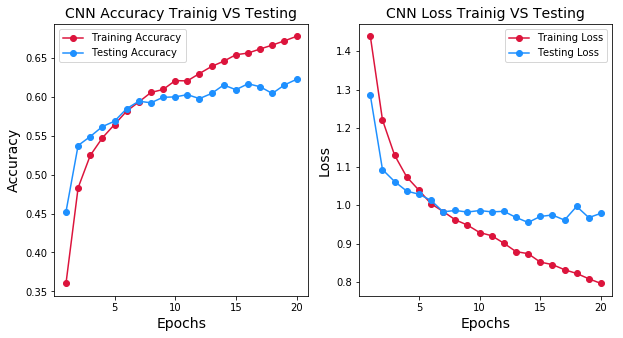

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(cnn_model_process.history['acc']) + 1), cnn_model_process.history['acc'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(cnn_model_process.history['val_acc']) + 1), cnn_model_process.history['val_acc'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('CNN Accuracy Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(cnn_model_process.history['loss']) + 1), cnn_model_process.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(cnn_model_process.history['val_loss']) + 1), cnn_model_process.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Loss Trainig VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

### 3) Overcome Overfitting Problem By Adding Dropout Layers into Convolutional Neural Network

    1.Add dropout layer (alpha = 0.25) at the end of fully connected layer
    
    2.Mini-Batch Size = 32;
    
    3.Epochs Size = 20;
    
    4.Using ImageDataGenerator to generate more training data for fitting model;
    
    5.Visualize the accuracy on training set and test set

In [16]:
cnn_model_dropout = Sequential()
# Convolutional Layer 1:
cnn_model_dropout.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (48, 48, 1), padding = 'same'))
cnn_model_dropout.add(BatchNormalization())
cnn_model_dropout.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 1:
cnn_model_dropout.add(MaxPooling2D((2, 2), strides = (2, 2), padding = 'same'))
# Convolutional Layer 2:
cnn_model_dropout.add(Conv2D(64, kernel_size = (3, 3), activation = 'linear', padding = 'same'))
cnn_model_dropout.add(BatchNormalization())
cnn_model_dropout.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 2:
cnn_model_dropout.add(MaxPooling2D((2, 2), strides = (2, 2), padding = 'same'))
# Convolutional Layer 3:
cnn_model_dropout.add(Conv2D(128, kernel_size = (3, 3), activation = 'linear', padding = 'same'))
cnn_model_dropout.add(BatchNormalization())
cnn_model_dropout.add(LeakyReLU(alpha = 0.1))
# Max Pooling Layer 3:
cnn_model_dropout.add(MaxPooling2D((2, 2), strides = (2, 2), padding = 'same'))
# Flatten Preprocessing:
cnn_model_dropout.add(Flatten())
# Fully Connected Layer (Dense Layer):
cnn_model_dropout.add(Dense(128, activation = 'linear'))
cnn_model_dropout.add(BatchNormalization())
cnn_model_dropout.add(LeakyReLU(alpha = 0.1))
# Dropout Layer 4:
cnn_model_dropout.add(Dropout(0.3))
# Output Layer (Dense Layer):
cnn_model_dropout.add(Dense(5, activation = 'softmax'))

# Compile CNN model
sgd = keras.optimizers.SGD(lr = 0.005, decay = 1e-6, momentum = 0.8, nesterov = True)
cnn_model_dropout.compile(loss = keras.losses.categorical_crossentropy, optimizer = sgd, metrics = ['accuracy'])
cnn_model_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 24, 24, 64)        0         
__________

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    horizontal_flip = True)
datagen.fit(train_X)

# Fits the model on batches with real-time data augmentation:
cnn_model_dropout_process = cnn_model_dropout.fit_generator(datagen.flow(train_X, train_Y, batch_size = 16),
                                                            steps_per_epoch = len(train_X) / 16, 
                                                            epochs = 30, verbose = 1, validation_data = (test_X, test_Y))
# cnn_model_dropout_process = cnn_model_dropout.fit(train_X, train_Y, batch_size = 32, epochs = 20, verbose = 1, validation_data = (test_X, test_Y))

Epoch 1/30
1626/1625 [==============================] - 143s 88ms/step - loss: 1.4634 - acc: 0.3633 - val_loss: 1.3589 - val_acc: 0.4045
Epoch 2/30
1626/1625 [==============================] - 142s 87ms/step - loss: 1.2994 - acc: 0.4412 - val_loss: 1.3782 - val_acc: 0.4134
Epoch 3/30
1626/1625 [==============================] - 142s 87ms/step - loss: 1.2307 - acc: 0.4720 - val_loss: 1.1425 - val_acc: 0.5194
Epoch 4/30
1626/1625 [==============================] - 142s 87ms/step - loss: 1.1847 - acc: 0.4990 - val_loss: 1.4873 - val_acc: 0.3815
Epoch 5/30
1626/1625 [==============================] - 142s 87ms/step - loss: 1.1561 - acc: 0.5062 - val_loss: 1.1703 - val_acc: 0.5060
Epoch 6/30
1626/1625 [==============================] - 142s 87ms/step - loss: 1.1278 - acc: 0.5263 - val_loss: 1.0674 - val_acc: 0.5544
Epoch 7/30
1626/1625 [==============================] - 142s 87ms/step - loss: 1.1129 - acc: 0.5301 - val_loss: 1.1450 - val_acc: 0.5175
Epoch 8/30
1626/1625 [===================

In [40]:
# cnn_model_dropout.save('cnn_model_dropout_5C.h5py')

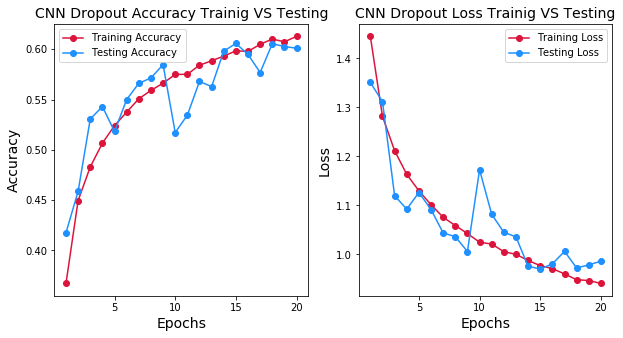

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].plot(range(1, len(cnn_model_dropout_process.history['acc']) + 1), cnn_model_dropout_process.history['acc'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, len(cnn_model_dropout_process.history['val_acc']) + 1), cnn_model_dropout_process.history['val_acc'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('CNN Dropout Accuracy Trainig VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')
axes[1].plot(range(1, len(cnn_model_dropout_process.history['loss']) + 1), cnn_model_dropout_process.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, len(cnn_model_dropout_process.history['val_loss']) + 1), cnn_model_dropout_process.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('CNN Dropout Loss Trainig VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

### 4) Building VGG-16 From Scratch

    1.Add dropout layer (alpha = 0.5) at the end of each fully connected layer
    
    2.Mini-Batch Size = 64;
    
    3.Epochs Size = 20;
    
    4.Visualize the accuracy on training set and test set

#### 4.1) VGG-16 Architecture

    1. Convolutional Layer 1: 64 units, 3 x 3 filter, same zero padding, ReLu activation function
    
    2. Convolutional Layer 1: 64 units, 3 x 3 filter, same zero padding, ReLu activation function
    
       Maxpooling Layer 1: 2 x 2 filter, 2 strides, same zero padding
    
    3. Convolutional Layer 2: 128 units, 3 x 3 filter, same zero padding, ReLu activation function
    
    4. Convolutional Layer 2: 128 units, 3 x 3 filter, same zero padding, ReLu activation function
    
       Maxpooling Layer 1: 2 x 2 filter, 2 strides, same zero padding
    
    5. Convolutional Layer 3: 256 units, 3 x 3 filter, same zero padding, ReLu activation function
    
    6. Convolutional Layer 3: 256 units, 3 x 3 filter, same zero padding, ReLu activation function
    
    7. Convolutional Layer 3: 256 units, 3 x 3 filter, same zero padding, ReLu activation function
    
       Maxpooling Layer 3: 2 x 2 filter, 2 strides, same zero padding
    
    8. Convolutional Layer 4: 512 units, 3 x 3 filter, same zero padding, ReLu activation function
    
    9. Convolutional Layer 4: 512 units, 3 x 3 filter, same zero padding, ReLu activation function
    
    10. Convolutional Layer 4: 512 units, 3 x 3 filter, same zero padding, ReLu activation function
    
        Maxpooling Layer 4: 2 x 2 filter, 2 strides, same zero padding
       
    11. Convolutional Layer 5: 512 units, 3 x 3 filter, same zero padding, ReLu activation function
    
    12. Convolutional Layer 5: 512 units, 3 x 3 filter, same zero padding, ReLu activation function
    
    13. Convolutional Layer 5: 512 units, 3 x 3 filter, same zero padding, ReLu activation function
    
        Maxpooling Layer 5: 2 x 2 filter, 2 strides, same zero padding
       
        Flatten preprocessing layer to fit the fully connected layer;
    
    14. Fully connected layer (Dense Layer): 4096 units, LeakyReLU activation function;
    
    15. Fully connected layer (Dense Layer): 4096 units, LeakyReLU activation function;
    
    16 .Output layer (Dense Layer): 5 outputs, Softmax activation function

In [41]:
VGG16_model = Sequential()
# Block 1
VGG16_model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (48, 48, 1), padding = 'same', name = 'block1_conv1'))  # 1
VGG16_model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same', name = 'block1_conv2'))                             # 2
VGG16_model.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block1_maxpool'))

# Block 2
VGG16_model.add(Conv2D(128, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block2_conv1'))                              # 3
VGG16_model.add(Conv2D(128, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block2_conv2'))                              # 4
VGG16_model.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block2_maxpool'))

# Block 3
VGG16_model.add(Conv2D(256, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block3_conv1'))                              # 5
VGG16_model.add(Conv2D(256, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block3_conv2'))                              # 6
VGG16_model.add(Conv2D(256, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block3_conv3'))                              # 7
VGG16_model.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block3_maxpool'))

# Block 4
VGG16_model.add(Conv2D(512, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block4_conv1'))                              # 8
VGG16_model.add(Conv2D(512, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block4_conv2'))                              # 9
VGG16_model.add(Conv2D(512, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block4_conv3'))                              # 10
VGG16_model.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block4_maxpool'))

# Block 5
VGG16_model.add(Conv2D(512, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block5_conv1'))                              # 11
VGG16_model.add(Conv2D(512, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block5_conv2'))                              # 12
VGG16_model.add(Conv2D(512, kernel_size = (3, 3), activation='relu', padding = 'same', name = 'block5_conv3'))                              # 13
VGG16_model.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block5_maxpool'))

# Classification Block
VGG16_model.add(Flatten())
VGG16_model.add(Dense(4096, activation = 'relu', name = 'fc_1'))                                                                            # 14
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(4096, activation = 'relu', name = 'fc_2'))                                                                            # 15
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(5, activation = 'softmax', name = 'prediction'))                                                                      # 16

sgd = keras.optimizers.SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov = True)
VGG16_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = sgd, metrics = ['accuracy'])
VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_maxpool (MaxPooling2D (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_maxpool (MaxPooling2D (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)       295168    
__________

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    horizontal_flip = True)
datagen.fit(train_X)

# Fits the model on batches with real-time data augmentation:
VGG16_model_process = VGG16_model.fit_generator(datagen.flow(train_X, train_Y, batch_size = 64),
                                                            steps_per_epoch = len(train_X) / 64, 
                                                            epochs = 10, verbose = 1, validation_data = (test_X, test_Y))
#VGG16_model_process = VGG16_model.fit(train_X, train_Y, batch_size = 64, epochs = 20, verbose = 1, validation_data = (test_X, test_Y))

### 5) Adding BatchNormalization and LeakyReLU to VGG-16
    
    1.Add BatchNormalization layer before activation function;
    
    2.Switch from ReLU activation to LeakyReLU (alpha = 0.01) activation;
    
    3.Add dropout layer (alpha = 0.5) at the end of each fully connected layer;

    4.Mini-Batch Size = 64;
    
    5.Epochs Size = 20;
    
    6.Visualize the accuracy on training set and test set

In [43]:
VGG16_model_bn = Sequential()
# Block 1
VGG16_model_bn.add(Conv2D(64, kernel_size = (3, 3), activation = 'linear', input_shape = (48, 48, 1), padding = 'same', name = 'block1_conv1'))  # 1
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Conv2D(64, kernel_size = (3, 3), activation = 'linear', padding = 'same', name = 'block1_conv2'))                             # 2 
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))                                                                         
VGG16_model_bn.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block1_maxpool'))

# Block 2
VGG16_model_bn.add(Conv2D(128, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block2_conv1'))                              # 3
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Conv2D(128, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block2_conv2'))                              # 4
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block2_maxpool'))

# Block 3
VGG16_model_bn.add(Conv2D(256, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block3_conv1'))                              # 5
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Conv2D(256, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block3_conv2'))                              # 6
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Conv2D(256, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block3_conv3'))                              # 7
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block3_maxpool'))

# Block 4
VGG16_model_bn.add(Conv2D(512, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block4_conv1'))                              # 8
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Conv2D(512, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block4_conv2'))                              # 9
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Conv2D(512, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block4_conv3'))                              # 10
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block4_maxpool'))

# Block 5
VGG16_model_bn.add(Conv2D(512, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block5_conv1'))                              # 11
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Conv2D(512, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block5_conv2'))                              # 12
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Conv2D(512, kernel_size = (3, 3), activation='linear', padding = 'same', name = 'block5_conv3'))                              # 13
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(MaxPooling2D((2,2), strides = (2,2), padding = 'same', name = 'block5_maxpool'))

# Classification Block
VGG16_model_bn.add(Flatten())
VGG16_model_bn.add(Dense(4096, activation = 'linear', name = 'fc_1'))                                                                            # 14
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Dropout(0.5))
VGG16_model_bn.add(Dense(4096, activation = 'linear', name = 'fc_2'))                                                                            # 15
VGG16_model_bn.add(BatchNormalization())
VGG16_model_bn.add(LeakyReLU(alpha = 0.01))
VGG16_model_bn.add(Dropout(0.5))
VGG16_model_bn.add(Dense(5, activation = 'softmax', name = 'prediction'))                                                                        # 16

sgd = keras.optimizers.SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov = True)
VGG16_model_bn.compile(loss = keras.losses.categorical_crossentropy, optimizer = sgd, metrics = ['accuracy'])
VGG16_model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_81 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_81 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_82 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_82 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
block1_maxpool (MaxPooling2D (None, 24, 24, 64)        0         
__________

In [48]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    horizontal_flip = True)
datagen.fit(train_X)

# Fits the model on batches with real-time data augmentation:
VGG16_model_bn_process = VGG16_model_bn.fit_generator(datagen.flow(train_X, train_Y, batch_size = 64),
                                                            steps_per_epoch = len(train_X) / 64, 
                                                            epochs = 10, verbose = 1, validation_data = (test_X, test_Y))
#VGG16_model_bn_process = VGG16_model_bn.fit(train_X, train_Y, batch_size = 64, epochs = 20, verbose = 1, validation_data = (test_X, test_Y))

Epoch 1/10
407/406 [==============================] - 1213s 3s/step - loss: 0.7661 - acc: 0.7043 - val_loss: 1.0748 - val_acc: 0.5727
Epoch 2/10
407/406 [==============================] - 1210s 3s/step - loss: 0.7215 - acc: 0.7195 - val_loss: 1.0517 - val_acc: 0.6009
Epoch 3/10
407/406 [==============================] - 1213s 3s/step - loss: 0.6949 - acc: 0.7298 - val_loss: 1.1062 - val_acc: 0.5776
Epoch 4/10
407/406 [==============================] - 1213s 3s/step - loss: 0.6668 - acc: 0.7402 - val_loss: 1.0666 - val_acc: 0.6098
Epoch 5/10
407/406 [==============================] - 1211s 3s/step - loss: 0.6455 - acc: 0.7524 - val_loss: 1.1683 - val_acc: 0.5736
Epoch 6/10
407/406 [==============================] - 1213s 3s/step - loss: 0.6220 - acc: 0.7616 - val_loss: 1.0458 - val_acc: 0.6153
Epoch 7/10
407/406 [==============================] - 1214s 3s/step - loss: 0.5990 - acc: 0.7695 - val_loss: 1.0895 - val_acc: 0.6042
Epoch 8/10
407/406 [==============================] - 1211s 3s

In [50]:
#VGG16_model_bn.save('vgg16_model_bn.h5py')

### 6) Transfer Learning with Pretrained VGG16

    1. Extend the grayscale image to have 3 channels while each channel is the same;
    
    2. Use the pretrained VGG16 weights and train only the top which is the fully connected layers

In [28]:
vgg16_input = Input(shape = (48, 48, 3), name = 'Image_input')
base_model = VGG16(weights = 'imagenet', include_top = False, input_tensor = vgg16_input)

x = base_model(vgg16_input)
x = Flatten()(x)
x = Dense(4096, activation = 'linear', name = 'fc_1')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha = 0.01)(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation = 'linear', name = 'fc_2')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha = 0.01)(x)
x = Dropout(0.5)(x)
x = Dense(5, activation = 'softmax', name = 'prediction')(x)

vgg16_pretrained = Model(input = vgg16_input, output = x)
for layer in vgg16_pretrained.layers[:2]:
    layer.trainable=False
for layer in vgg16_pretrained.layers[2:]:
    layer.trainable=True
sgd = keras.optimizers.SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov = True)
vgg16_pretrained.compile(loss = keras.losses.categorical_crossentropy, optimizer = sgd, metrics = ['accuracy'])
vgg16_pretrained.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Image_input (InputLayer)     (None, 48, 48, 3)         0         
_________________________________________________________________
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 4096)              2101248   
_________________________________________________________________
batch_normalization_7 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4096)              0         
__________

In [29]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    horizontal_flip = True)
datagen.fit(train_X)

# Fits the model on batches with real-time data augmentation:
vgg16_pretrained_process = vgg16_pretrained.fit_generator(datagen.flow(train_X, train_Y, batch_size = 64),
                                                            steps_per_epoch = len(train_X) / 64, 
                                                            epochs = 20, verbose = 1, validation_data = (test_X, test_Y))
#VGG16_model_bn_process = VGG16_model_bn.fit(train_X, train_Y, batch_size = 64, epochs = 20, verbose = 1, validation_data = (test_X, test_Y))

Epoch 1/20
449/448 [==============================] - 292s 651ms/step - loss: 1.7439 - acc: 0.3289 - val_loss: 1.4642 - val_acc: 0.3794
Epoch 2/20
449/448 [==============================] - 290s 646ms/step - loss: 1.5593 - acc: 0.3616 - val_loss: 1.3611 - val_acc: 0.4170
Epoch 3/20
449/448 [==============================] - 291s 648ms/step - loss: 1.4911 - acc: 0.3750 - val_loss: 1.3482 - val_acc: 0.4189
Epoch 4/20
449/448 [==============================] - 291s 648ms/step - loss: 1.4683 - acc: 0.3808 - val_loss: 1.3275 - val_acc: 0.4370
Epoch 5/20
449/448 [==============================] - 291s 647ms/step - loss: 1.4492 - acc: 0.3934 - val_loss: 1.3636 - val_acc: 0.4186
Epoch 6/20
449/448 [==============================] - 291s 647ms/step - loss: 1.4468 - acc: 0.3882 - val_loss: 1.3233 - val_acc: 0.4430
Epoch 7/20
449/448 [==============================] - 291s 647ms/step - loss: 1.4367 - acc: 0.3937 - val_loss: 1.3203 - val_acc: 0.4478
Epoch 8/20
449/448 [============================

## PART 3: Facial Detection and Emotion Detection in Real Life

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model
from mtcnn.mtcnn import MTCNN
import cv2
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

cnn_model_dropout_5C = load_model('C:/Users/Kimmy/Desktop/cnn_model_dropout_5C.h5py')

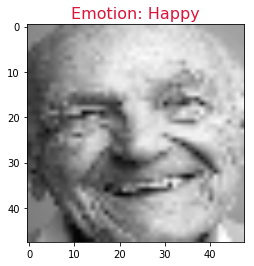

In [7]:
path = 'happy.jpg'
test = cv2.imread(path)
detector = MTCNN()
test_head_dict = detector.detect_faces(test)
test = Image.open(path)
test_head = test.crop((test_head_dict[0]['box'][0], 
                       test_head_dict[0]['box'][1], 
                       test_head_dict[0]['box'][0] + test_head_dict[0]['box'][2], 
                       test_head_dict[0]['box'][1] + test_head_dict[0]['box'][3]))
test_array = np.asarray(test_head.resize((48, 48)).convert('L'))
plt.imshow(test_array, interpolation = 'bilinear', cmap = 'gray')
test_array = test_array.reshape(1, 48, 48, 1)

emotion_list = ['Angry', 'Frustrated', 'Happy', 'Surprised', 'Unemotional']
emotion = emotion_list[cnn_model_dropout_5C.predict(test_array).argmax()]
plt.title('Emotion: ' + emotion, fontsize = 16, color = 'crimson')
print()

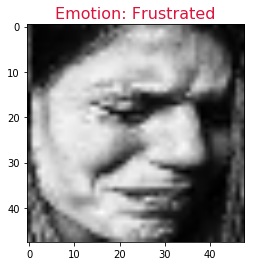

In [8]:
path = 'frustrated.jpg'
test = cv2.imread(path)
detector = MTCNN()
test_head_dict = detector.detect_faces(test)
test = Image.open(path)
test_head = test.crop((test_head_dict[0]['box'][0], 
                       test_head_dict[0]['box'][1], 
                       test_head_dict[0]['box'][0] + test_head_dict[0]['box'][2], 
                       test_head_dict[0]['box'][1] + test_head_dict[0]['box'][3]))
test_array = np.asarray(test_head.resize((48, 48)).convert('L'))
plt.imshow(test_array, interpolation = 'bilinear', cmap = 'gray')
test_array = test_array.reshape(1, 48, 48, 1)

emotion_list = ['Angry', 'Frustrated', 'Happy', 'Surprised', 'Unemotional']
emotion = emotion_list[cnn_model_dropout_5C.predict(test_array).argmax()]
plt.title('Emotion: ' + emotion, fontsize = 16, color = 'crimson')
print()